In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from misc import data
import seaborn as sns
sns.set()

dataloader, df, mutants_tensor, mutants_df, neff = data()

Parsing fasta 'data/BLAT_ECOLX_hmmerbit_plmc_n5_m30_f50_t0.2_r24-286_id100_b105.a2m'
Parsing labels 'data/BLAT_ECOLX_hmmerbit_plmc_n5_m30_f50_t0.2_r24-286_id100_b105_LABELS.a2m'
Generating 8403 1-hot encodings
Generating 8403 1-hot encodings. Took 0.811s torch.Size([8403, 23, 253])
Generating 4807 1-hot encodings
Generating 4807 1-hot encodings. Took 0.418s torch.Size([4807, 23, 253])


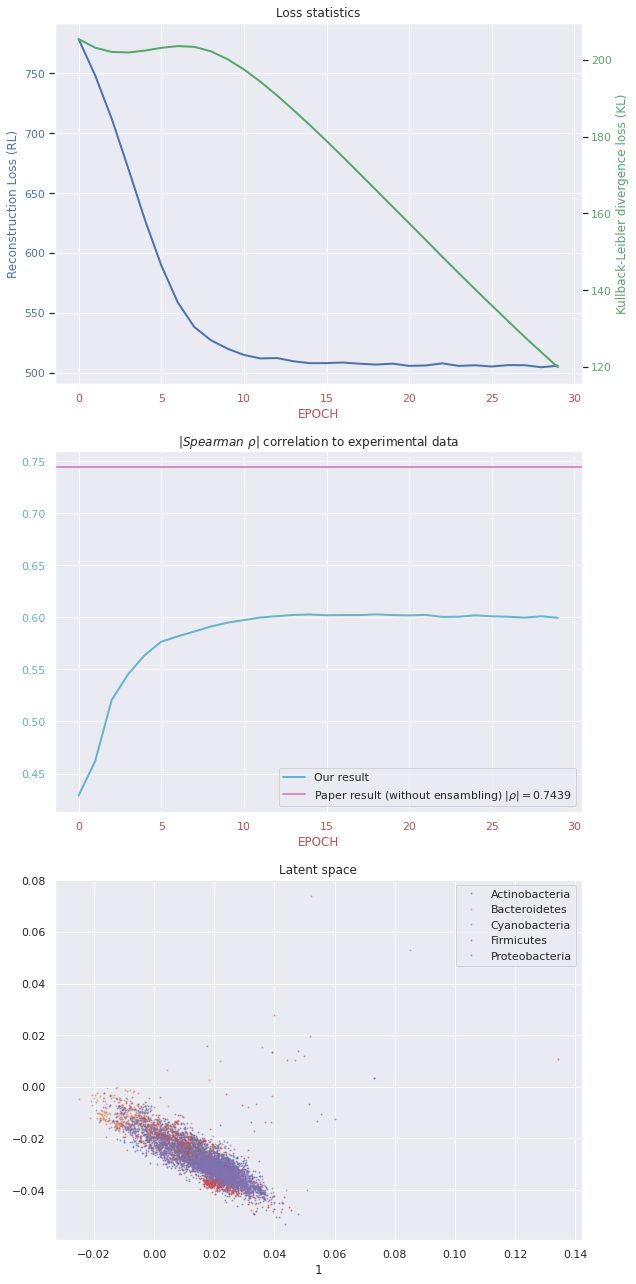

In [ ]:
from vae2 import VAE
model_dict = torch.load('/work/dtu-02460/models/full_paper.model.pth')

plt.figure(figsize=(9,18))
plt.subplot(3,1,1)
plt.title("Loss statistics")
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_xlabel('EPOCH', c='C3')
ax1.tick_params(axis='x', labelcolor='C3')
ax1.set_ylabel('Reconstruction Loss (RL)', c='C0')
ax1.tick_params(axis='y', labelcolor='C0')
ax1.plot(model_dict['stats']['rl'], lw=2, c='C0')
ax2.set_ylabel('Kullback-Leibler divergence loss (KL)', c='C2')
ax2.tick_params(axis='y', labelcolor='C2')
ax2.plot(model_dict['stats']['klp'], lw=2, c='C2')
ax2.grid(False)

plt.subplot(3,1,2)
plt.title(r"$|Spearman\ \rho|$ correlation to experimental data")
plt.xlabel('EPOCH', c='C3')
plt.tick_params(axis='x', labelcolor='C3')
plt.plot(model_dict['stats']['cor'], lw=2, c='C9', label="Our result")
plt.tick_params(axis='y', labelcolor='C9')
plt.axhline(y=0.74388, c='C6', lw=2, label=f'Paper result (without ensambling) ' + rf'$|\rho|={round(0.74388, 4)}$')
plt.legend()

plt.subplot(3,1,3)
plt.title("Latent space")
mask = df['label'].isin(df['label'].value_counts()[:5].index) # We limit to top 5 classes only
vae = VAE(**model_dict['args'])
vae.load_state_dict(model_dict['state_dict'])
vae.eval()
_, mu, logvar = vae(dataloader.dataset[mask], rep=False)
columns = [str(i+1) for i in range(mu.shape[1])] + ['label']
dfp = pd.DataFrame(data=np.c_[mu.detach().numpy(), df[mask]['label']], columns=columns)
dfp = dfp.set_index('1').groupby('label')['2']
dfp.plot(style='.', ms=2, alpha=0.5, legend=True);
plt.tight_layout()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=35838f82-2ce6-4453-9bd2-2d87a43af151' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>